In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
import keras
import ast
import os
from dask import bag
from random import shuffle
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from keras import Model, Sequential, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.metrics import top_k_categorical_accuracy
from io import BytesIO
%matplotlib inline

Using TensorFlow backend.


In [2]:
fnames = os.listdir("input/train_simplified")
fnames = ['input/train_simplified/cat.csv', 'input/train_simplified/dog.csv', 'input/train_simplified/dragon.csv', 'input/train_simplified/bee.csv', 'input/train_simplified/zebra.csv', 'input/train_simplified/crocodile.csv', 'input/train_simplified/hedgehog.csv', 'input/train_simplified/kangaroo.csv', 'input/train_simplified/lobster.csv', 'input/train_simplified/owl.csv', 'input/train_simplified/pig.csv', 'input/train_simplified/rabbit.csv', 'input/train_simplified/raccoon.csv', 'input/train_simplified/flamingo.csv', 'input/train_simplified/rhinoceros.csv', 'input/train_simplified/shark.csv', 'input/train_simplified/snail.csv', 'input/train_simplified/squirrel.csv', 'input/train_simplified/swan.csv', 'input/train_simplified/tiger.csv', 'input/train_simplified/whale.csv', 'input/train_simplified/penguin.csv']
shuffle(fnames)
#fnames = fnames[0:20]
cnames = ['countrycode', 'drawing', 'key_id', 'recognized', 'timestamp', 'word']
drawlist = []
for f in fnames:
    #f = "input/train_simplified/" + f
    print(f)
    with open(f, 'r') as file:
        first = pd.read_csv(file, nrows=10)
        first = first[first.recognized==True].head(3)
        drawlist.append(first)
draw_df = pd.DataFrame(np.concatenate(drawlist), columns=cnames)
draw_df

input/train_simplified/swan.csv
input/train_simplified/snail.csv
input/train_simplified/dragon.csv
input/train_simplified/rhinoceros.csv
input/train_simplified/crocodile.csv
input/train_simplified/cat.csv
input/train_simplified/bee.csv
input/train_simplified/raccoon.csv
input/train_simplified/whale.csv
input/train_simplified/zebra.csv
input/train_simplified/pig.csv
input/train_simplified/shark.csv
input/train_simplified/hedgehog.csv
input/train_simplified/kangaroo.csv
input/train_simplified/lobster.csv
input/train_simplified/squirrel.csv
input/train_simplified/dog.csv
input/train_simplified/flamingo.csv
input/train_simplified/rabbit.csv
input/train_simplified/tiger.csv
input/train_simplified/owl.csv
input/train_simplified/penguin.csv


,countrycode,drawing,key_id,recognized,timestamp,word
0,GB,"[[[0, 7, 22, 52, 72, 81, 82, 69, 66, 69, 73, 9...",4594852085891072,True,2017-03-13 14:27:25.548390,swan
1,PL,"[[[170, 186, 193, 194, 198, 217, 255, 250, 231...",5771933759045632,True,2017-03-20 11:46:37.832130,swan
2,BR,"[[[30, 62, 93, 109, 119, 124, 126, 137, 148, 1...",4846095295315968,True,2017-01-26 01:05:30.322890,swan
3,DE,"[[[71, 72, 79, 93, 99, 95, 90, 83, 60, 52, 18,...",5657097159049216,True,2017-01-26 20:22:32.389610,snail
4,US,"[[[72, 39, 26, 7, 0, 1, 16, 45, 69, 109, 136, ...",5481513674080256,True,2017-03-27 14:30:30.093430,snail
5,US,"[[[193, 185, 160, 152, 152, 170, 178, 195, 204...",6139780679073792,True,2017-03-09 13:20:00.685250,snail
6,US,"[[[136, 119, 71, 53, 9, 0, 21, 64, 67, 65, 75,...",5795934136958976,True,2017-03-26 18:11:00.449190,dragon
7,BE,"[[[5, 30, 40, 73, 83, 87, 87, 70, 44, 36, 6, 2...",5715354980450304,True,2017-03-28 21:42:33.092960,dragon
8,US,"[[[109, 102, 101, 105, 128, 154, 168, 177, 210...",4739868104065024,True,2017-01-27 16:26:18.424590,dragon
9,AU,"[[[253, 216], [0, 87]], [[253, 255, 250, 243, ...",4944687414640640,True,2017-03-30 00:36:22.096160,rhinoceros


In [3]:
example1s = [ast.literal_eval(pts) for pts in draw_df.drawing.values]

C:\Users\Abir Hassan\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


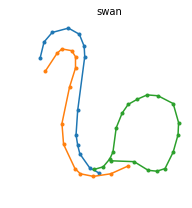

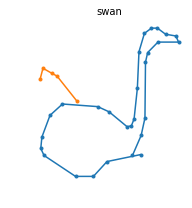

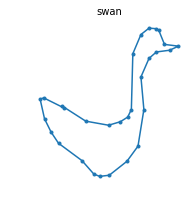

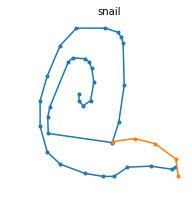

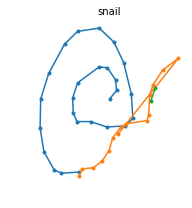

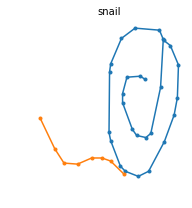

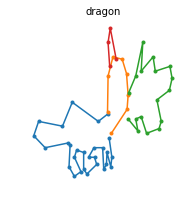

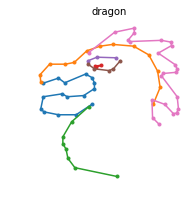

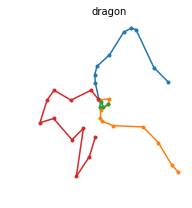

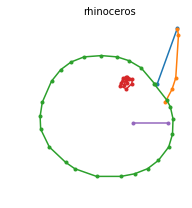

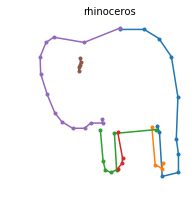

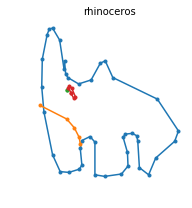

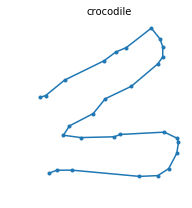

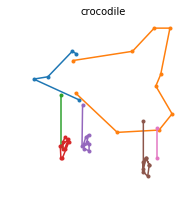

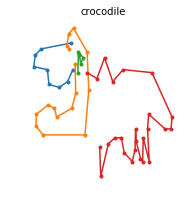

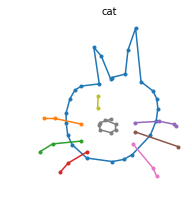

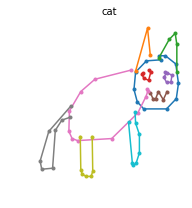

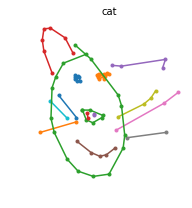

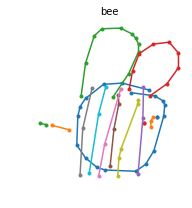

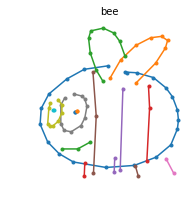

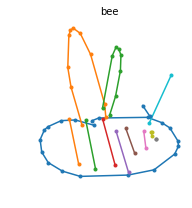

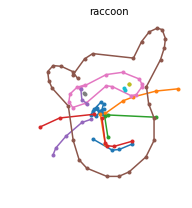

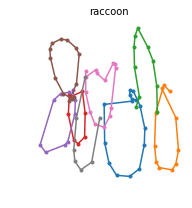

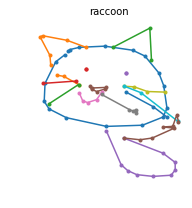

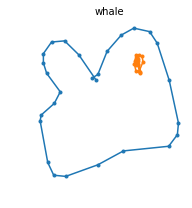

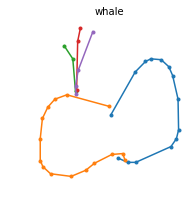

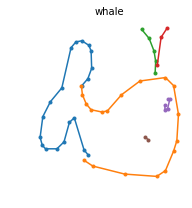

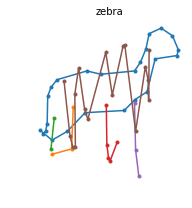

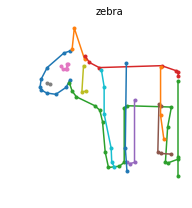

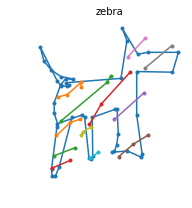

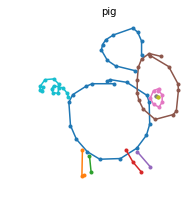

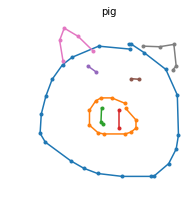

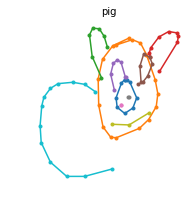

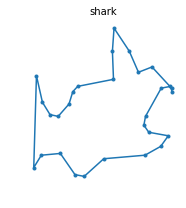

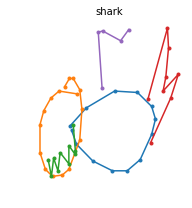

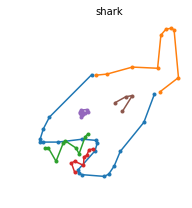

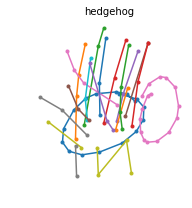

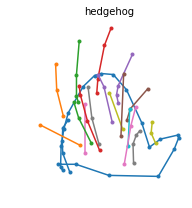

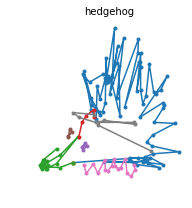

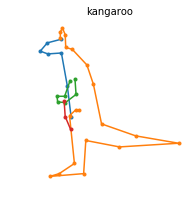

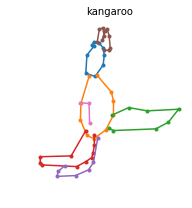

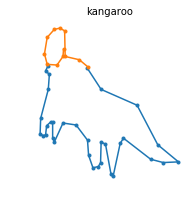

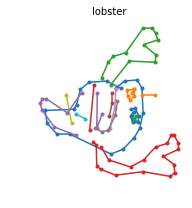

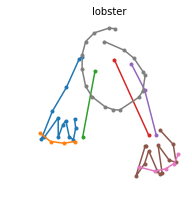

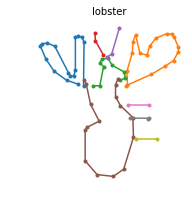

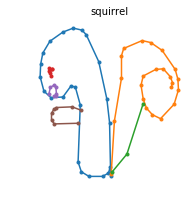

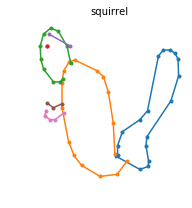

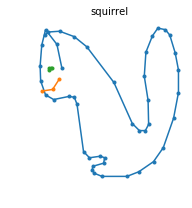

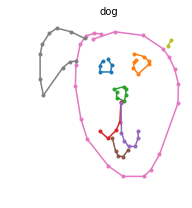

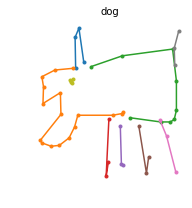

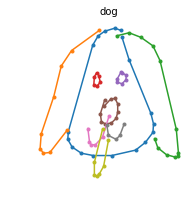

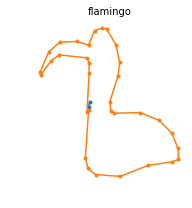

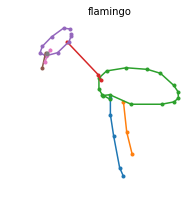

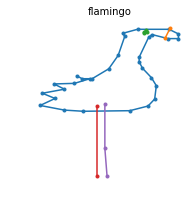

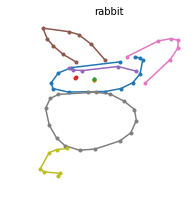

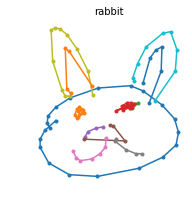

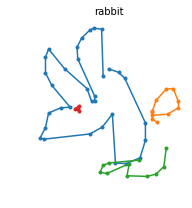

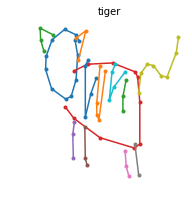

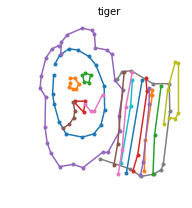

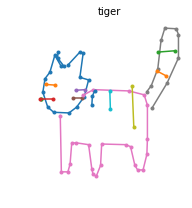

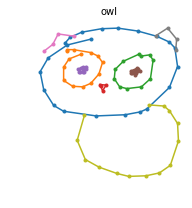

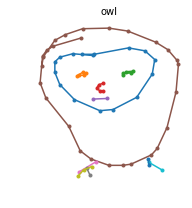

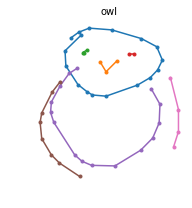

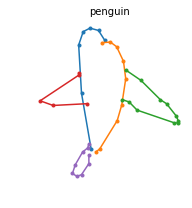

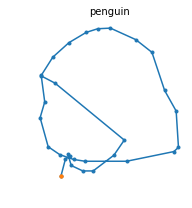

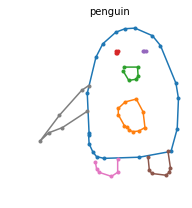

In [4]:
labels = draw_df.word.tolist()
for i, example in enumerate(example1s):
    plt.figure(figsize=(6,3))
    for x,y in example:
        plt.subplot(1,2,1)
        plt.plot(x, y, marker='.')
        plt.axis('off')
        label = labels[i]
        plt.title(label, fontsize=10)
    plt.gca().invert_yaxis()
    plt.show()

In [5]:
class_dict = {x[:-4].replace(" ", "_"):i for i, x in enumerate(fnames)}
imheight, imwidth = 32, 32  
ims_per_class = 2000 

num_classes = len(fnames)
num_classes 

22

In [6]:
def strokesToNumpyArray(strokes):
    image = Image.new("P", (256,256), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)
    image = image.resize((imheight, imwidth))
    return np.array(image)/255

def save_images(imagebag):
    #SAVE NUMPY ARRAY TO IMAGE
    from matplotlib import cm
    for image in range(len(imagebag.compute()[:3])):
        im = Image.fromarray(np.uint8(cm.gist_earth(imagebag.compute()[image])*255))
        #print(im)
        im.save("images/test{0}.png".format(image))

In [7]:
train_grand = []
class_paths = fnames

for i,c in enumerate(class_paths[0: num_classes]):
    train = pd.read_csv(c, usecols=['drawing', 'recognized'], nrows=ims_per_class*5//4)
    train = train[train.recognized == True].head(ims_per_class)
    imagebag = bag.from_sequence(train.drawing.values).map(strokesToNumpyArray) 
    save_images(imagebag)
    trainarray = np.array(imagebag.compute())  # PARALLELIZE
    trainarray = np.reshape(trainarray, (ims_per_class, -1))    
    labelarray = np.full((train.shape[0], 1), i)
    trainarray = np.concatenate((labelarray, trainarray), axis=1)
    train_grand.append(trainarray)
    
train_grand = np.array([train_grand.pop() for i in np.arange(num_classes)]) #less memory than np.concatenate
train_grand = train_grand.reshape((-1, (imheight*imwidth+1)))

In [8]:
train_grand.shape

(44000, 1025)

In [9]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(
    train_grand[ : , 1:], train_grand[ : , 0], test_size=0.2, random_state=42, shuffle=True)

y_train = keras.utils.to_categorical(Y_tr, num_classes)
X_train = X_tr.reshape(X_tr.shape[0], imheight, imwidth, 1)
y_val = keras.utils.to_categorical(Y_ts, num_classes)
X_val = X_ts.reshape(X_ts.shape[0], imheight, imwidth, 1)

print(y_train.shape, "\n",
      X_train.shape, "\n",
      y_val.shape, "\n",
      X_val.shape)

(35200, 22) 
 (35200, 32, 32, 1) 
 (8800, 22) 
 (8800, 32, 32, 1)


In [10]:
# Modify model layers to increase accuracy
# ------------------------------------------------
# Model 1: relU
# ------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(680, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 680)               2785960   
__________

In [10]:
# Modify model layers to increase accuracy
# ------------------------------------------------
# Model 2: tanh
# ------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='tanh', input_shape=(imheight, imwidth, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(680, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 680)               2785960   
__________

In [10]:
# Modify model layers to increase accuracy
# ------------------------------------------------
# Model 3: sigmoid
# ------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='sigmoid', input_shape=(imheight, imwidth, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(680, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 680)               2785960   
__________

In [10]:
# Modify model layers to increase accuracy
# ------------------------------------------------
# Model 4: relU w/ batch norm
# ------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(680, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [11]:
def top_3_accuracy(x,y): 
    t3 = top_k_categorical_accuracy(x,y, 3)
    return t3

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.val_acc = []
        self.acc = []
        
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.val_acc.append(logs.get('val_acc'))
        self.acc.append(logs.get('acc'))

history_cb = LossHistory()
callbacks = [history_cb]

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', top_3_accuracy])

In [14]:
tf.global_variables_initializer()
model.fit(x=X_train, y=y_train,
          batch_size = 32,
          epochs = 11, #play around with this number for varying amounts of accuracy
          #sometimes testing accuracy levels off and doesn't improve with more epochs
          validation_data = (X_val, y_val),
          callbacks = callbacks)

Train on 35200 samples, validate on 8800 samples
Epoch 1/11
35200/35200 [==============================] - 133s 4ms/step - loss: 1.9700 - acc: 0.3957 - top_3_accuracy: 0.6445 - val_loss: 1.4379 - val_acc: 0.5732 - val_top_3_accuracy: 0.8047
Epoch 2/11
35200/35200 [==============================] - 133s 4ms/step - loss: 1.4169 - acc: 0.5649 - top_3_accuracy: 0.8016 - val_loss: 1.2155 - val_acc: 0.6311 - val_top_3_accuracy: 0.8495
Epoch 3/11
35200/35200 [==============================] - 135s 4ms/step - loss: 1.2261 - acc: 0.6143 - top_3_accuracy: 0.8436 - val_loss: 1.1008 - val_acc: 0.6568 - val_top_3_accuracy: 0.8691
Epoch 4/11
35200/35200 [==============================] - 134s 4ms/step - loss: 1.0933 - acc: 0.6540 - top_3_accuracy: 0.8691 - val_loss: 1.0684 - val_acc: 0.6702 - val_top_3_accuracy: 0.8775
Epoch 5/11
35200/35200 [==============================] - 134s 4ms/step - loss: 0.9842 - acc: 0.6854 - top_3_accuracy: 0.8887 - val_loss: 1.0409 - val_acc: 0.6780 - val_top_3_accuracy

In [15]:
model.save('CNN-reLU-Test')

In [16]:
#Load the model you want to predict with
keras.metrics.top_3_accuracy = top_3_accuracy
model = keras.models.load_model('CNN-reLU-Test', custom_objects= {'metrics':['accuracy', top_3_accuracy]})

In [17]:
mode21Hist = history_cb
print(len(mode21Hist.acc))
print(len(mode21Hist.val_acc))

11
11


Text(0, 0.5, 'Accuracy')

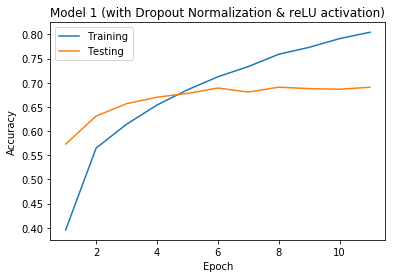

In [18]:
xVal = np.arange(1, len(mode21Hist.acc) + 1, 1)
plt.plot(xVal, mode21Hist.acc)
plt.plot(xVal, mode21Hist.val_acc)
plt.title('Model 1 (with Dropout Normalization & reLU activation)')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

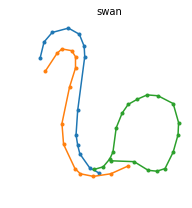

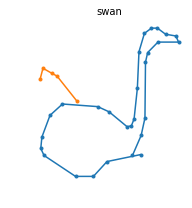

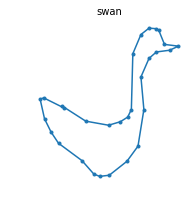

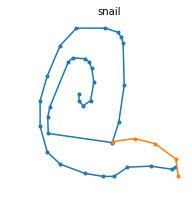

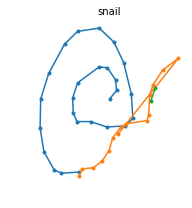

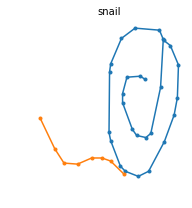

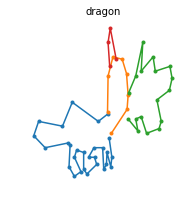

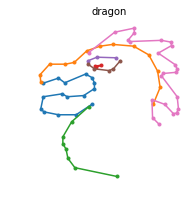

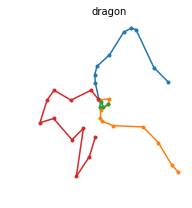

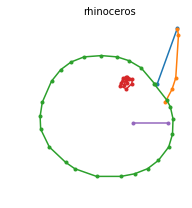

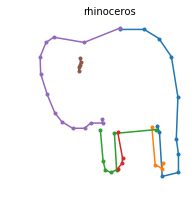

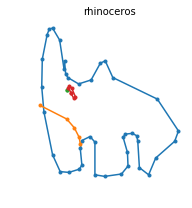

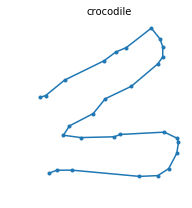

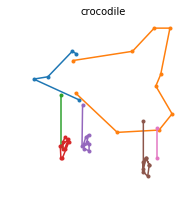

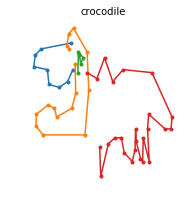

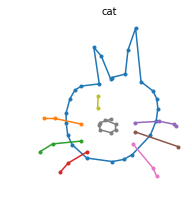

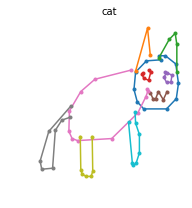

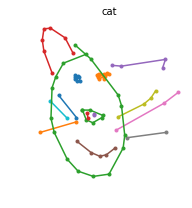

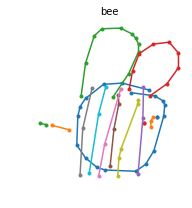

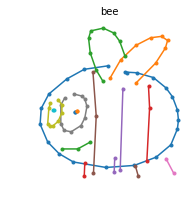

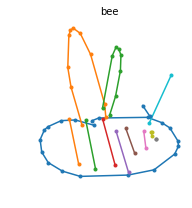

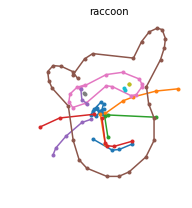

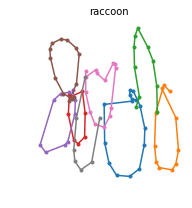

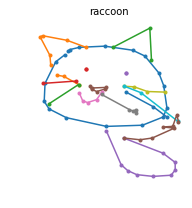

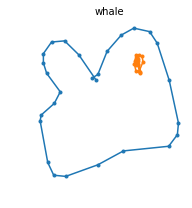

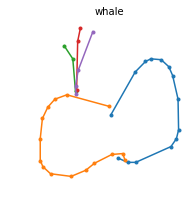

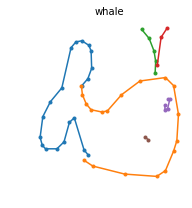

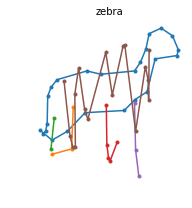

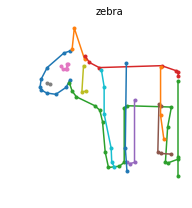

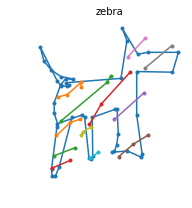

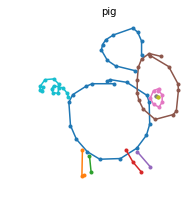

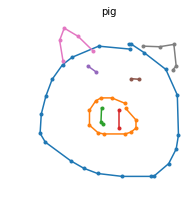

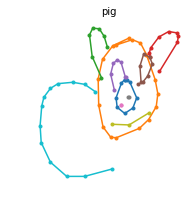

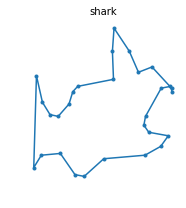

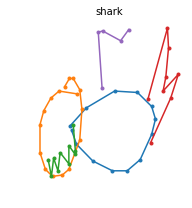

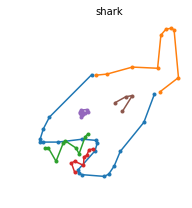

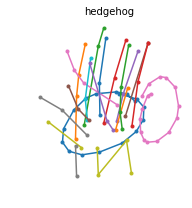

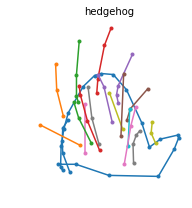

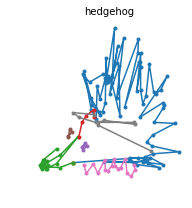

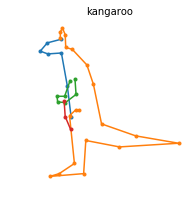

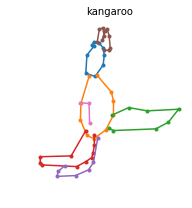

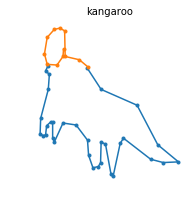

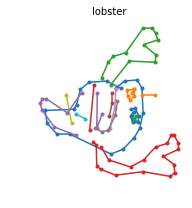

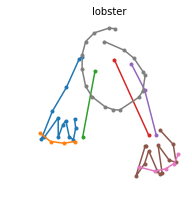

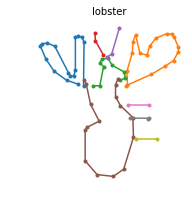

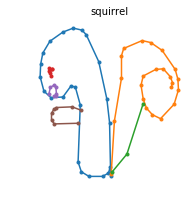

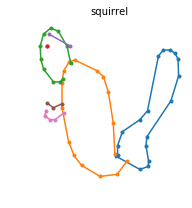

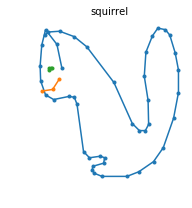

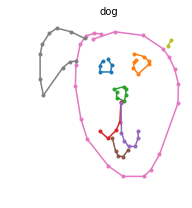

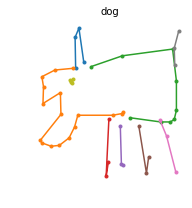

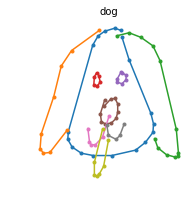

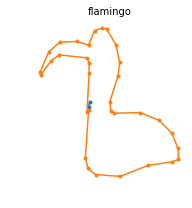

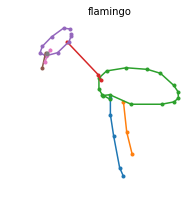

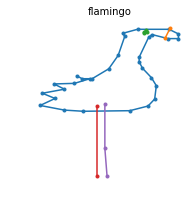

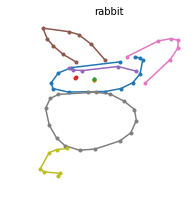

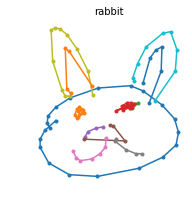

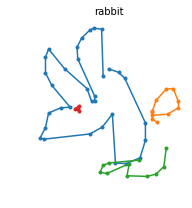

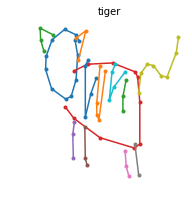

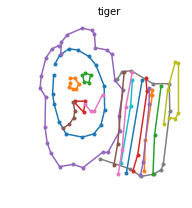

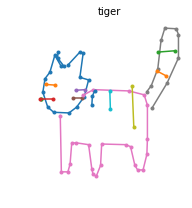

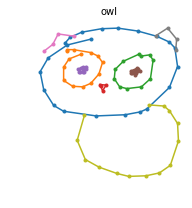

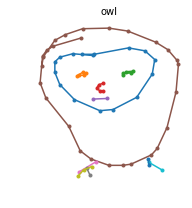

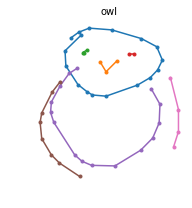

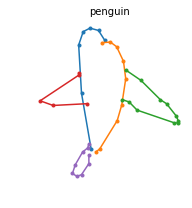

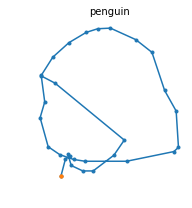

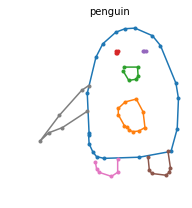

array([[ 0, 15, 17],
       [ 0, 17,  7],
       [ 0, 17, 15],
       [ 1,  2, 10],
       [ 1, 10,  2],
       [ 1,  0,  7],
       [ 2,  4, 19],
       [ 2, 12,  5],
       [ 2,  8,  4],
       [ 3, 10,  5],
       [ 3,  8, 10],
       [ 3, 16,  5],
       [ 4,  8,  2],
       [ 4, 11,  7],
       [ 4,  2,  7],
       [ 5, 19, 13],
       [ 5, 10,  7],
       [ 5, 19,  7],
       [ 6,  9, 19],
       [ 6,  7,  2],
       [ 6, 12, 18],
       [19,  5,  7],
       [ 7, 19, 12],
       [ 7,  5, 20],
       [ 8, 11,  3],
       [ 8, 11,  3],
       [ 8, 10,  3],
       [ 9,  2, 19],
       [ 9, 19, 16],
       [19,  5,  9],
       [12, 16,  2],
       [10,  5, 16],
       [10,  6,  0],
       [11,  8,  4],
       [11,  8,  4],
       [11, 16,  5],
       [12,  7, 19],
       [12,  6,  7],
       [12, 19,  7],
       [13,  0,  2],
       [13, 14,  2],
       [13,  3, 16],
       [14,  2,  7],
       [14,  2, 21],
       [14,  2,  6],
       [15,  6,  2],
       [15,  7,  0],
       [15,  

In [19]:
#TESTING DATA WHERE WE KNOW WHAT ANIMAL IT IS

labels = draw_df.word.tolist()
for i, example in enumerate(example1s):
    plt.figure(figsize=(6,3))
    for x,y in example:
        plt.subplot(1,2,1)
        plt.plot(x, y, marker='.')
        plt.axis('off')
        label = labels[i]
        plt.title(label, fontsize=10)
    plt.gca().invert_yaxis()
    plt.show()

ttvlist = []    
#CONVERT IMAGE TO NUMPY ARRAY
imagebag = bag.from_sequence(draw_df.drawing.values).map(strokesToNumpyArray)
save_images(imagebag)
testarray = np.array(imagebag.compute())
testarray = np.reshape(testarray, (testarray.shape[0], imheight, imwidth, 1))
testpreds = model.predict(testarray, verbose=0)
ttvs = np.argsort(-testpreds)[:, 0:3]  # top 3
ttvlist.append(ttvs)
ttvarray = np.concatenate(ttvlist)
ttvarray

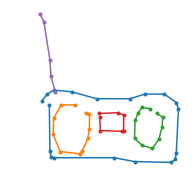

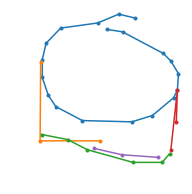

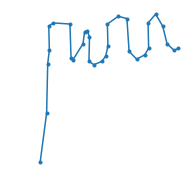

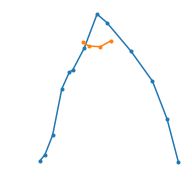

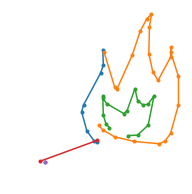

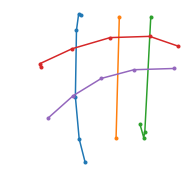

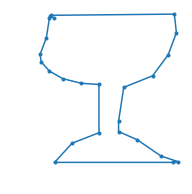

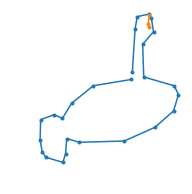

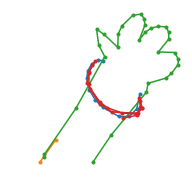

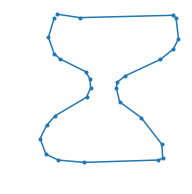

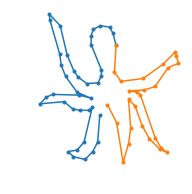

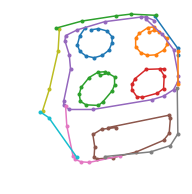

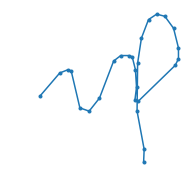

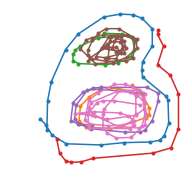

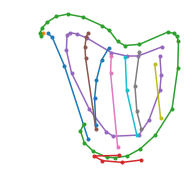

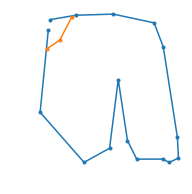

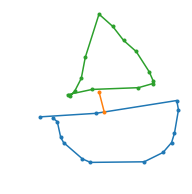

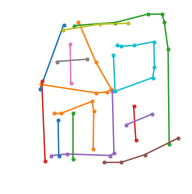

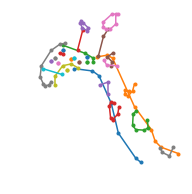

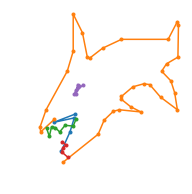

In [66]:
#PREDICT BASED ON MODEL
#ACTUAL TEST DATA

ttvlist = []
reader = pd.read_csv('input/test_simplified.csv', index_col=['key_id'],
    chunksize=20)

for chunk in reader:
    drawing = [ast.literal_eval(pts) for pts in chunk.drawing.values]
    #labels = chunk.word.tolist()
    for i, example in enumerate(drawing):
        plt.figure(figsize=(6,3))
        for x,y in example:
            plt.subplot(1,2,1)
            plt.plot(x, y, marker='.')
            plt.axis('off')
            #label = labels[i]
            #plt.title(label, fontsize=10)
        plt.gca().invert_yaxis()
        plt.show()
    
    
    #CONVERT IMAGE TO NUMPY ARRAY
    imagebag = bag.from_sequence(chunk.drawing.values).map(strokesToNumpyArray)
    
    testarray = np.array(imagebag.compute())
    testarray = np.reshape(testarray, (testarray.shape[0], imheight, imwidth, 1))
    testpreds = model.predict(testarray, verbose=0)
    ttvs = np.argsort(-testpreds)[:, 0:3]  # top 3
    ttvlist.append(ttvs)
    break

#save_images(imagebag)
ttvarray = np.concatenate(ttvlist)

In [20]:
print(testpreds, ttvs)
class_dict = {i:x[:-4].replace(" ", "_") for i, x in enumerate(fnames)}
for key in class_dict:
    class_dict[key] = class_dict[key][class_dict[key].find("/")+1:]
    class_dict[key] = class_dict[key][class_dict[key].find("/")+1:]
preds_df = pd.DataFrame({'first': ttvarray[:,0], 'second': ttvarray[:,1], 'third': ttvarray[:,2]})
preds_df = preds_df.replace(class_dict)
preds_df['words'] = preds_df['first'].apply(str) + " " + preds_df['second'].apply(str) + " " + preds_df['third'].apply(str)

[[9.9763763e-01 2.6535921e-05 1.1582646e-06 ... 6.3601476e-08
  1.8796883e-10 2.0781832e-09]
 [9.9963427e-01 7.2976150e-07 4.7540116e-06 ... 7.9238282e-07
  1.2062252e-09 2.7062233e-12]
 [8.7263906e-01 8.2556504e-08 3.8535145e-04 ... 3.3280361e-07
  1.6628053e-07 2.8721028e-09]
 ...
 [1.9689179e-07 6.2865819e-09 2.0029264e-02 ... 1.0794481e-07
  2.0422641e-04 9.7367394e-01]
 [1.4032923e-04 2.5984056e-05 4.0849257e-04 ... 2.2335671e-08
  1.1363276e-02 9.6613598e-01]
 [3.8230263e-07 2.2914107e-06 7.5711962e-04 ... 1.0692957e-07
  1.0595947e-04 9.8066062e-01]] [[ 0 15 17]
 [ 0 17  7]
 [ 0 17 15]
 [ 1  2 10]
 [ 1 10  2]
 [ 1  0  7]
 [ 2  4 19]
 [ 2 12  5]
 [ 2  8  4]
 [ 3 10  5]
 [ 3  8 10]
 [ 3 16  5]
 [ 4  8  2]
 [ 4 11  7]
 [ 4  2  7]
 [ 5 19 13]
 [ 5 10  7]
 [ 5 19  7]
 [ 6  9 19]
 [ 6  7  2]
 [ 6 12 18]
 [19  5  7]
 [ 7 19 12]
 [ 7  5 20]
 [ 8 11  3]
 [ 8 11  3]
 [ 8 10  3]
 [ 9  2 19]
 [ 9 19 16]
 [19  5  9]
 [12 16  2]
 [10  5 16]
 [10  6  0]
 [11  8  4]
 [11  8  4]
 [11 16  5]
 [12

In [21]:
labels[:33]

['swan',
 'swan',
 'swan',
 'snail',
 'snail',
 'snail',
 'dragon',
 'dragon',
 'dragon',
 'rhinoceros',
 'rhinoceros',
 'rhinoceros',
 'crocodile',
 'crocodile',
 'crocodile',
 'cat',
 'cat',
 'cat',
 'bee',
 'bee',
 'bee',
 'raccoon',
 'raccoon',
 'raccoon',
 'whale',
 'whale',
 'whale',
 'zebra',
 'zebra',
 'zebra',
 'pig',
 'pig',
 'pig']

In [22]:
labels[33:]

['shark',
 'shark',
 'shark',
 'hedgehog',
 'hedgehog',
 'hedgehog',
 'kangaroo',
 'kangaroo',
 'kangaroo',
 'lobster',
 'lobster',
 'lobster',
 'squirrel',
 'squirrel',
 'squirrel',
 'dog',
 'dog',
 'dog',
 'flamingo',
 'flamingo',
 'flamingo',
 'rabbit',
 'rabbit',
 'rabbit',
 'tiger',
 'tiger',
 'tiger',
 'owl',
 'owl',
 'owl',
 'penguin',
 'penguin',
 'penguin']

In [20]:
sub = pd.read_csv('input/sample_submission.csv', index_col=['key_id'])
sub['word'][:len(preds_df)] = preds_df.words.values
sub.to_csv('subcnn_small.csv')
sub[:len(preds_df)]

,word
key_id,
9000003627287624,bee hedgehog raccoon
9000010688666847,bee raccoon hedgehog
9000023642890129,bee hedgehog rabbit
9000038588854897,penguin lobster bee
9000052667981386,penguin owl kangaroo
9000057427034623,penguin lobster kangaroo
9000065506980882,crocodile swan dragon
9000087586309806,crocodile shark dragon
9000092580281382,crocodile dragon raccoon
